# Распределение значений датчиков в статике

Загружаем данные из файла метрик

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

with open('./data/all_sensors_on_white_static_forward_bend.log', mode='r') as data_file:
    lines = data_file.readlines()
metrics = []
for line in lines:
    metric = eval(line)
    for sns_count in range(0, len(metric['sns'])):
        metrics.append({'snv': metric['sns'][sns_count], 'sensor': sns_count})

df_white_forward_bend = pd.DataFrame(metrics)
mean_df_white_forward_bend = df_white_forward_bend.groupby("sensor",as_index=False).mean()

### Распределение значений от разных датчиков

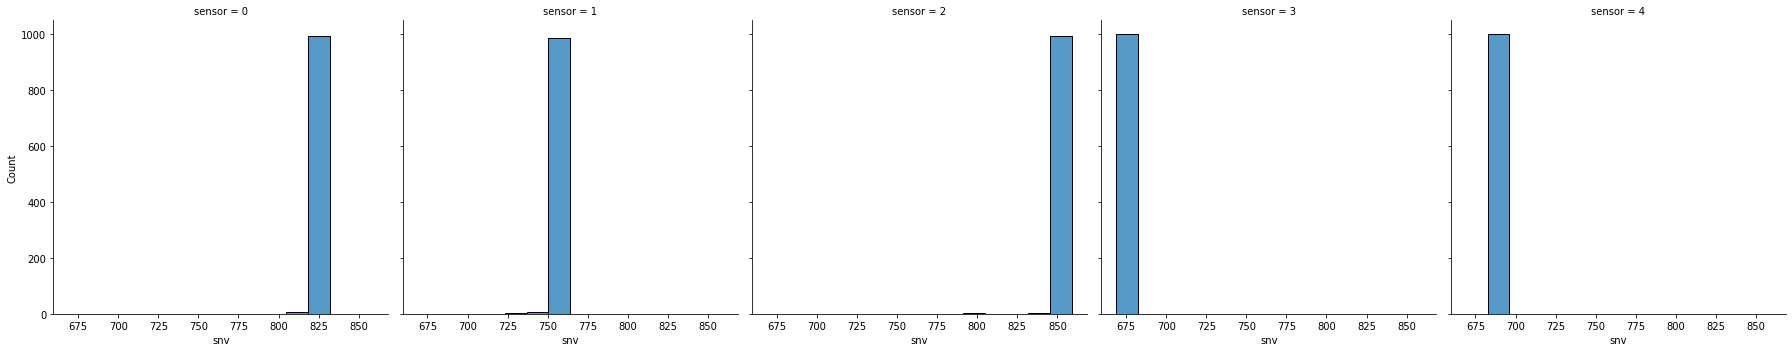

In [2]:
sns.displot(data=df_white_forward_bend, x="snv", col='sensor', multiple="stack",)
plt.tight_layout()
plt.show()

Видно, что у разных датчиков разные значения 

In [3]:
with open('./data/all_sensors_on_white_static_backward_bend.log', mode='r') as data_file:
    lines = data_file.readlines()
metrics = []
for line in lines:
    metric = eval(line)
    for sns_count in range(0, len(metric['sns'])):
        metrics.append({'snv': metric['sns'][sns_count], 'sensor': sns_count})

df_white_backward_bend = pd.DataFrame(metrics)
print(df_white_backward_bend)
mean_df_white_backward_bend = df_white_backward_bend.groupby("sensor",as_index=False).mean()

      snv  sensor
0     721       0
1     665       1
2     735       2
3     598       3
4     609       4
...   ...     ...
4995  722       0
4996  665       1
4997  736       2
4998  597       3
4999  609       4

[5000 rows x 2 columns]


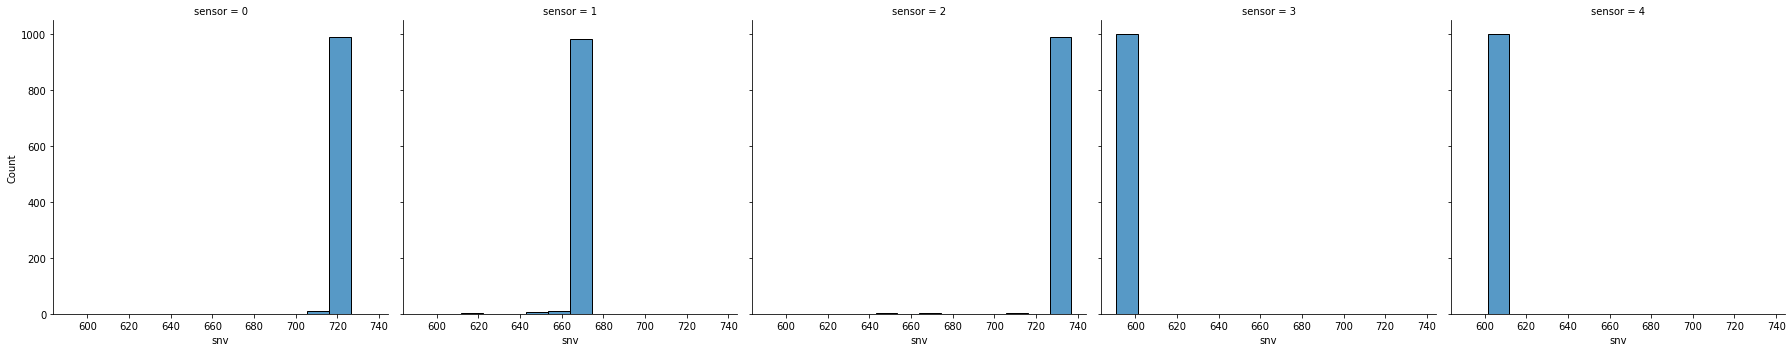

In [4]:
sns.displot(data=df_white_backward_bend, x="snv", col='sensor', multiple="stack",)
plt.tight_layout()
plt.show()

### Влияние наклона вперед/назад на значения датчиков

In [5]:
print(mean_df_white_forward_bend)
print(mean_df_white_backward_bend)

   sensor      snv
0       0  823.397
1       1  756.714
2       2  857.520
3       3  669.987
4       4  689.794
   sensor      snv
0       0  721.861
1       1  664.709
2       2  735.460
3       3  597.512
4       4  608.297


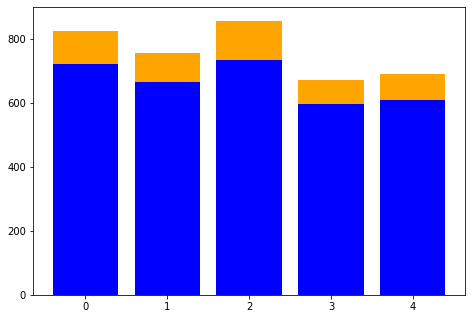

0    12.331354
1    12.158491
2    14.234070
3    10.817374
4    11.814687
Name: snv, dtype: float64

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mean_df_white_forward_bend["sensor"],mean_df_white_forward_bend["snv"], color = 'orange')
ax.bar(mean_df_white_backward_bend["sensor"],mean_df_white_backward_bend["snv"], color = 'blue')
plt.show()

(mean_df_white_forward_bend["snv"]-mean_df_white_backward_bend["snv"])/mean_df_white_forward_bend["snv"]*100

При работе на белом фоне влияние значений отображено на графике и составляет порядка 10-14 процентов


### Без калибровки

1. Распределение показаний датчиков в статике на белом +
1. Распределение показаний датчиков в статике на белом в положении наклона впреред+
1. Распределение показаний датчиков в статике на белом в положении наклона назад+
1. Распределение показаний датчиков в статике на черном
1. Распределение показаний датчиков в статике на черном в положении наклона впреред
1. Распределение показаний датчиков в статике на черном в положении наклона назад

### C калибровкой

1. Распределение показаний датчиков в статике на белом с калибровкой
1. Распределение показаний датчиков в статике на черном с калибровкой



